# House Price: Adavanced Techniques 

El dataset se extrajo de Kaggle y almacena todas las características de casas vendidas en Iowa. El objetivo es predicr el precio de la casa dadas sus características. 

## 1. Revisión de Datos de Entrenamiento y de Prueba
Primero importamos las librerías esenciales:

In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Ahora leemos los archivos csv de train y test para analizarlos:

In [223]:
train = pd.read_csv('train.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [224]:
test = pd.read_csv('test.csv')
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


Test tiene una columna menos que train. La columna extra de train es SalePrice que viene siendo el precio de la casa. La columna de precios correspondientes al test set se encuentra en el csv sample_submission.

In [225]:
SalePriceTest = pd.read_csv('sample_submission.csv')
SalePriceTest.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


## 2. Análisis Estadístico de la variable objetivo: SalePrice

(0, 442.56701000000055)

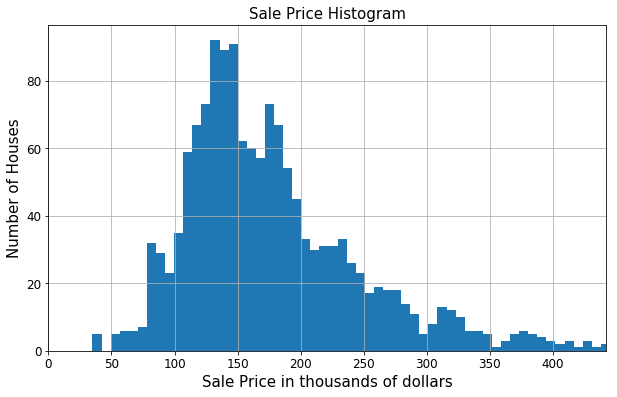

In [226]:
plt.figure(figsize = (10,6))
(train.SalePrice/1000).hist(bins=100)
plt.title('Sale Price Histogram', fontsize = 15)
plt.xlabel('Sale Price in thousands of dollars', fontsize = 15)
plt.ylabel('Number of Houses', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlim(0 , (train.SalePrice/1000).quantile(0.99))

Algunas medidas de tendencia central en unidades de miles de dólares:

In [227]:
(train.SalePrice/1000).describe()

count    1460.000000
mean      180.921196
std        79.442503
min        34.900000
25%       129.975000
50%       163.000000
75%       214.000000
max       755.000000
Name: SalePrice, dtype: float64

## 3. Análisis Estadístico de las Variables Independientes

Antes que nada, eliminemos la columna Id tanto del train como del test set:

In [228]:
train.drop('Id', 1, inplace = True)
test.drop('Id',1, inplace = True)

Tenemos tanto datos categóricos como numéricos, analicemos la proporción entre ambos:

In [229]:
cat = train.dtypes[train.dtypes == 'object'].index
num = train.dtypes[train.dtypes != 'object'].index

print('Sin considerar SalePrice, tenemos',  len(cat), 'variables categóricas y ',
     len(num) - 1, 'variables numéricas')

Sin considerar SalePrice, tenemos 43 variables categóricas y  36 variables numéricas


Haciendo un mapa de calor:

In [230]:
import seaborn as sbn

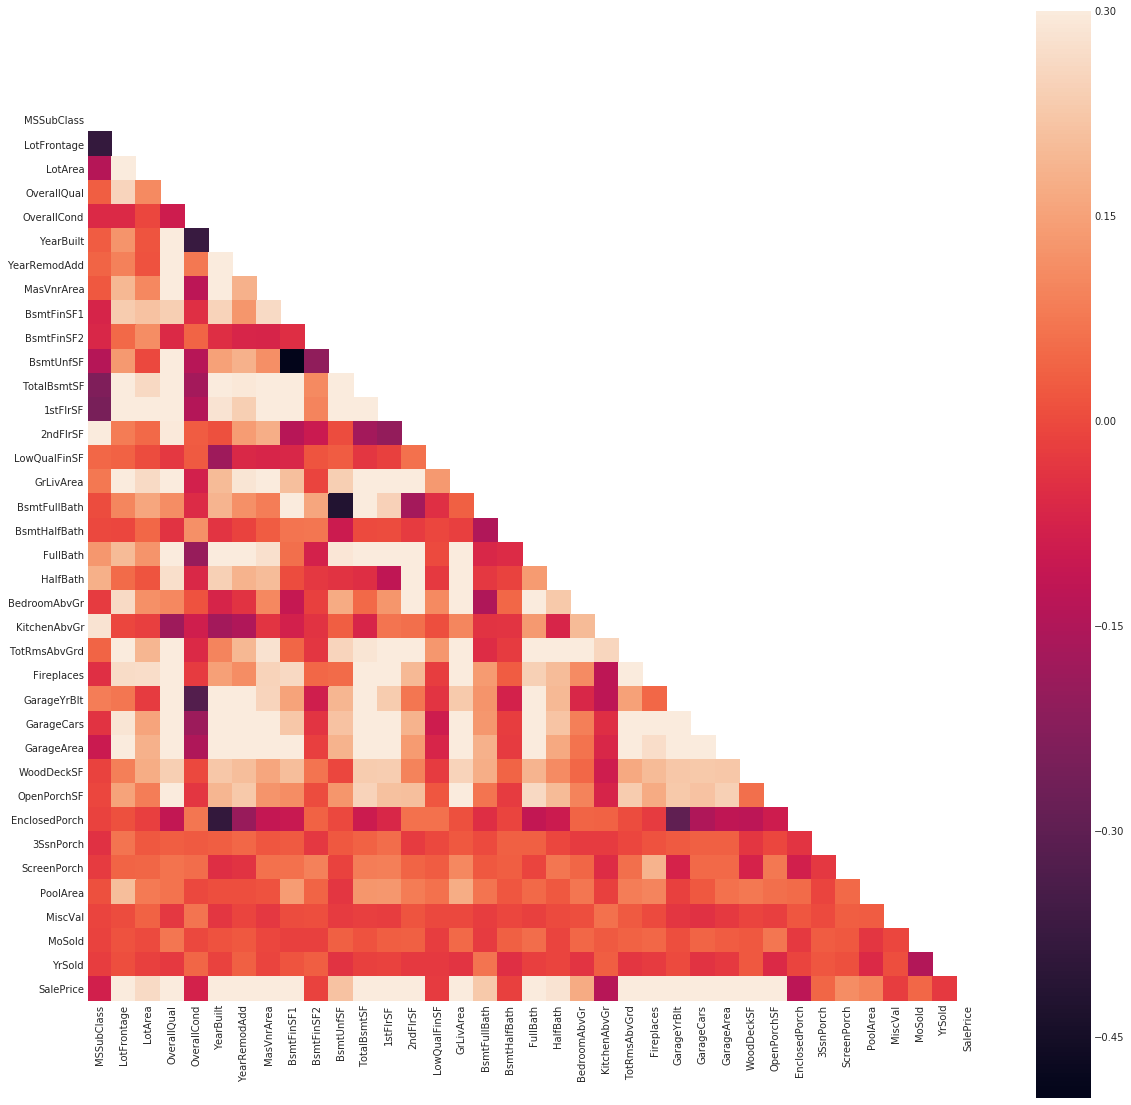

In [231]:
plt.figure(figsize = (20,20))

corr = train.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sbn.axes_style("whitegrid"):
    ax = sbn.heatmap(corr, mask=mask, vmax=.3, square=True)

En particular, nos interesan los coeficientes de correlación de SalePrice con las demás variables. Revisemos las 10 variables más correlacionadas positivamente del dataset con la variable objetivo:

In [232]:
col = train.corrwith(train.SalePrice).sort_values(ascending = False).head(10)

most_corr = pd.DataFrame(col)

most_corr.columns = ['Correlation Coeficient']

most_corr

,Correlation Coeficient
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


Ahora veamos cómo se relacionan las variables de la tabla con SalePrice:

### OverallQual

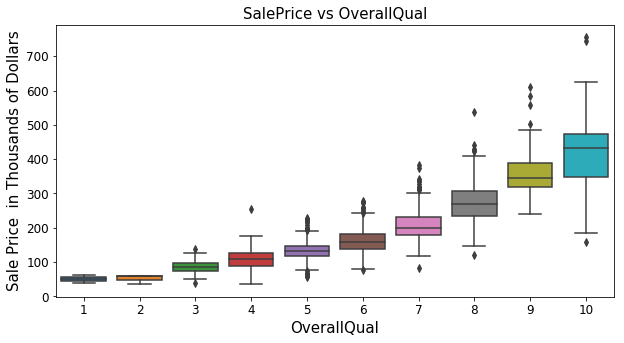

In [233]:
plt.figure(figsize = (10,5))
sbn.boxplot(train.OverallQual,(train.SalePrice/1000))
plt.title('SalePrice vs OverallQual', fontsize = 15)
plt.xlabel('OverallQual',fontsize = 15)
plt.ylabel('Sale Price  in Thousands of Dollars',fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12);

A medida que la calidad de la casa aumenta, también lo hace su precio. Nada más que decir.

### Living Area

C:\Users\Tycho Brahe\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Tycho Brahe\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(array([-200.,    0.,  200.,  400.,  600.,  800., 1000.]),
 <a list of 7 Text yticklabel objects>)

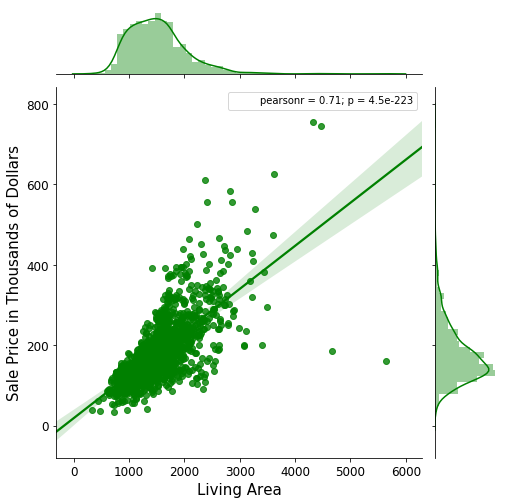

In [234]:
sbn.jointplot(train.GrLivArea, (train.SalePrice/1000), kind = 'reg', color = 'g', size = 7)
plt.xlabel('Living Area', fontsize = 15)
plt.ylabel('Sale Price in Thousands of Dollars', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

A medida que Living Area aumenta obviamente sube el precio de la casa. En la gráfica vemos 2 outliers que en un living area de más de 4000 unidades cuadradas tienen un precio demasiado bajo. Vamos a remover estos dos puntos:

In [235]:
train = train.drop(train[(train['GrLivArea']> 4000) 
           & (train['SalePrice'] < 300000)].index).reset_index(drop = True)

C:\Users\Tycho Brahe\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Tycho Brahe\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(array([-200.,    0.,  200.,  400.,  600.,  800., 1000.]),
 <a list of 7 Text yticklabel objects>)

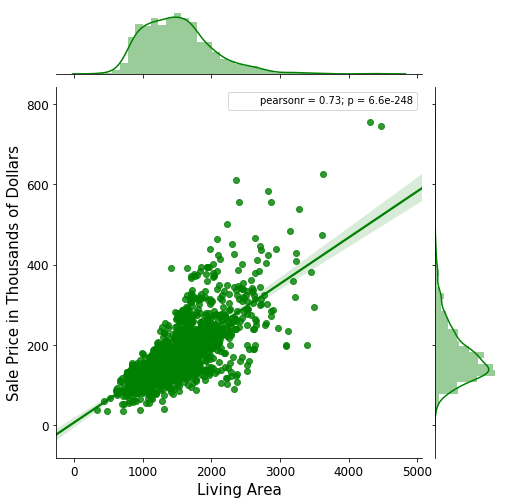

In [236]:
sbn.jointplot(train.GrLivArea, (train.SalePrice/1000), kind = 'reg', color = 'g', size = 7)
plt.xlabel('Living Area', fontsize = 15)
plt.ylabel('Sale Price in Thousands of Dollars', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

No sólo hemos eliminado los outliers sino que además el coeficiente de Pearson ha aumentado.

### Garage Cars

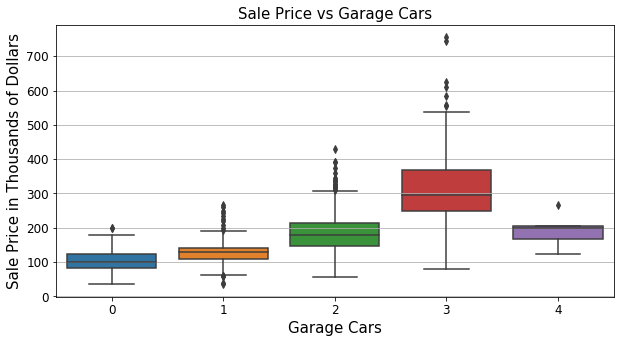

In [237]:
plt.figure(figsize = (10,5))
sbn.boxplot(train.GarageCars, (train.SalePrice/1000))
plt.title('Sale Price vs Garage Cars', fontsize = 15)
plt.xlabel('Garage Cars',fontsize = 15)
plt.ylabel('Sale Price in Thousands of Dollars',fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.grid(axis = 'y')

¿Las casas con garages a los que le caben cuatro coches cuestan menos que las que tienen tres? Eso no tiene sentido, vamos a deshacernos de todos los datos a los que sus garages le quepan cuatro coches:

In [238]:
train = train.drop(train[train['GarageCars'] > 3].index).reset_index(drop = True)

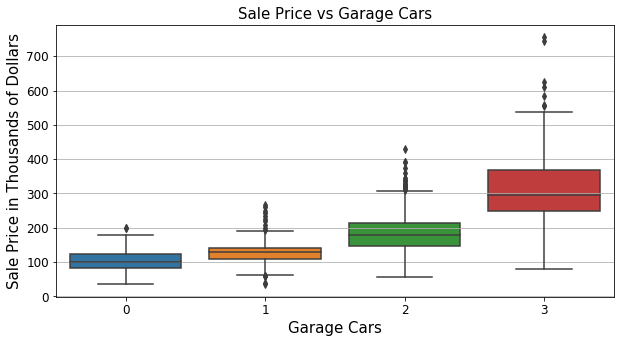

In [239]:
plt.figure(figsize = (10,5))
sbn.boxplot(train.GarageCars, (train.SalePrice/1000))
plt.title('Sale Price vs Garage Cars', fontsize = 15)
plt.xlabel('Garage Cars',fontsize = 15)
plt.ylabel('Sale Price in Thousands of Dollars',fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.grid(axis = 'y')

### Garage Area

C:\Users\Tycho Brahe\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Tycho Brahe\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


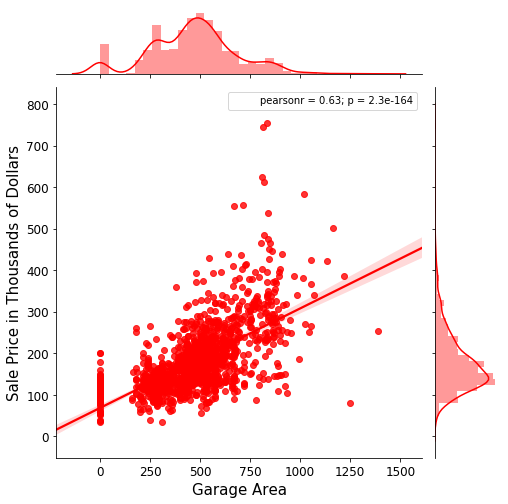

In [240]:
sbn.jointplot(train.GarageArea, (train.SalePrice/1000), kind = 'reg', color = 'r', size = 7)
plt.xlabel('Garage Area', fontsize = 15)
plt.ylabel('Sale Price in Thousands of Dollars', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12);

De nuevo tenemos dos outliers. Vamos a removerlos:

In [241]:
train = train.drop(train[(train['GarageArea']>1000) 
                         & (train['SalePrice']<300000)].index).reset_index(drop=True)

C:\Users\Tycho Brahe\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Tycho Brahe\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


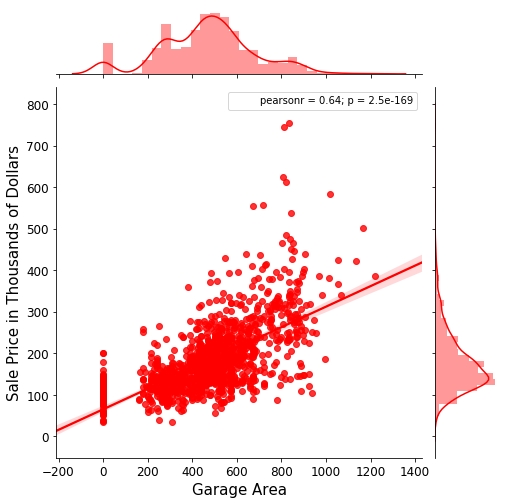

In [242]:
sbn.jointplot(train.GarageArea, (train.SalePrice/1000), kind = 'reg', color = 'r', size = 7)
plt.xlabel('Garage Area', fontsize = 15)
plt.ylabel('Sale Price in Thousands of Dollars', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12);

### Total Basement Surface

C:\Users\Tycho Brahe\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Tycho Brahe\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


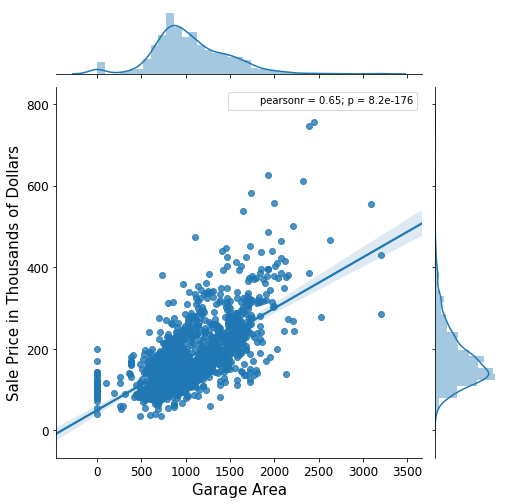

In [243]:
sbn.jointplot(train.TotalBsmtSF, (train.SalePrice/1000), kind = 'reg', size = 7)
plt.xlabel('Garage Area', fontsize = 15)
plt.ylabel('Sale Price in Thousands of Dollars', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12);

Nada que arreglar aquí.

### 1st Floor Surface

C:\Users\Tycho Brahe\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Tycho Brahe\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


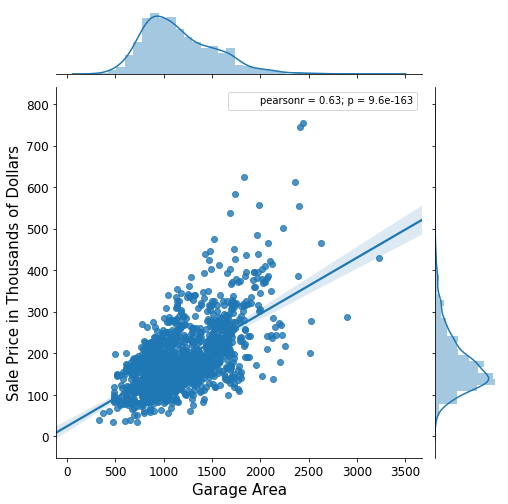

In [244]:
sbn.jointplot(train['1stFlrSF'], (train.SalePrice/1000), kind = 'reg', size = 7)
plt.xlabel('Garage Area', fontsize = 15)
plt.ylabel('Sale Price in Thousands of Dollars', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12);

Nada que arreglar tampoco aquí.

### Full Bath

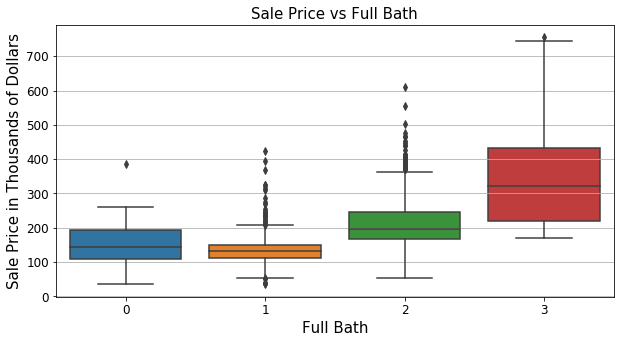

In [245]:
plt.figure(figsize = (10,5))
sbn.boxplot(train.FullBath, (train.SalePrice/1000))
plt.title('Sale Price vs Full Bath', fontsize = 15)
plt.xlabel('Full Bath',fontsize = 15)
plt.ylabel('Sale Price in Thousands of Dollars',fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.grid(axis = 'y')

Pese a que hay un pequeño extraño entre las casas con cero y un baño, no considero pertinente cambiar nada aquí tampoco.

### Total Rooms Above Grade

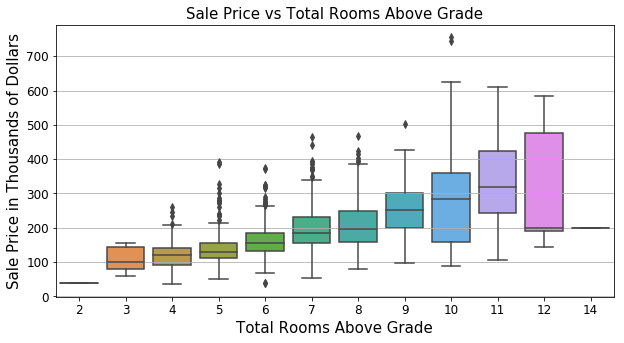

In [246]:
plt.figure(figsize = (10,5))
sbn.boxplot(train.TotRmsAbvGrd, (train.SalePrice/1000))
plt.title('Sale Price vs Total Rooms Above Grade', fontsize = 15)
plt.xlabel('Total Rooms Above Grade',fontsize = 15)
plt.ylabel('Sale Price in Thousands of Dollars',fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.grid(axis = 'y')

Parece que tenemos una casa con 14 cuartos que es ridículamente barata. Quitemos este outlier:

In [247]:
train = train.drop(train[train['TotRmsAbvGrd'] == 14].index).reset_index(drop=True)

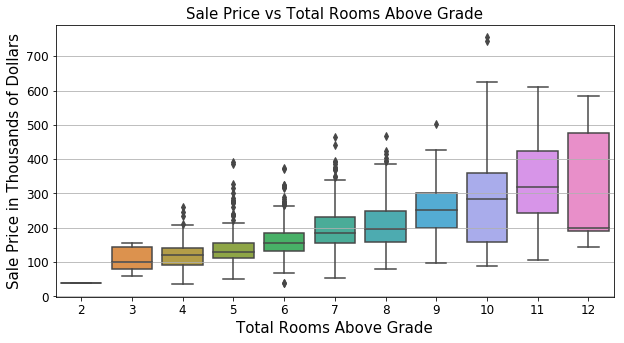

In [248]:
plt.figure(figsize = (10,5))
sbn.boxplot(train.TotRmsAbvGrd, (train.SalePrice/1000))
plt.title('Sale Price vs Total Rooms Above Grade', fontsize = 15)
plt.xlabel('Total Rooms Above Grade',fontsize = 15)
plt.ylabel('Sale Price in Thousands of Dollars',fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.grid(axis = 'y')

El problema ha sido arreglado.

### Year Built

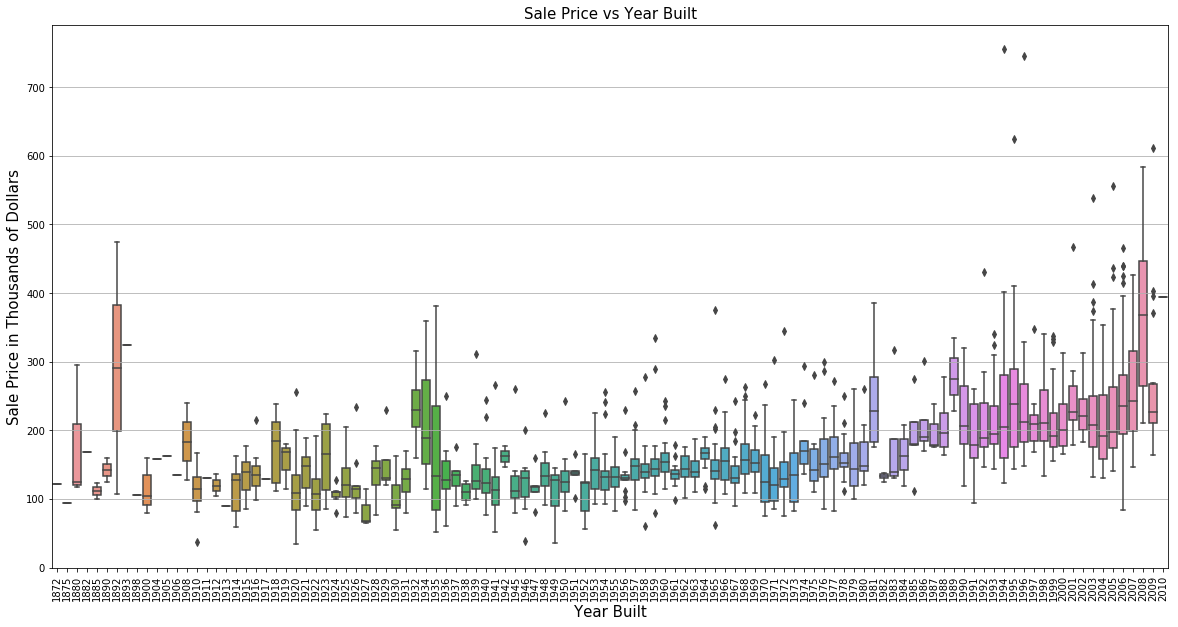

In [249]:
plt.figure(figsize = (20,10))
sbn.boxplot(train.YearBuilt, (train.SalePrice/1000))
plt.title('Sale Price vs Year Built', fontsize = 15)
plt.xlabel('Year Built',fontsize = 15)
plt.ylabel('Sale Price in Thousands of Dollars',fontsize = 15)
plt.xticks(fontsize = 10, rotation = 90)
plt.yticks(fontsize = 10)
plt.grid(axis = 'y')

No contamos con información para discriminar si hay un outlier aquí, el precio de una casa puede aumentar o disminuir mientras pasan los años, pero también podría tener que ver el año en qué se vendió y en qué situación económica se encontraba el país en ese año. 
Damos por terminado el análisis de las variables más correlacionadas con SalePrice.

En cuanto a las variables más correlacionadas negativamente:

In [250]:
col = train.corrwith(train.SalePrice).sort_values(ascending = False).tail(14)
most_corr = pd.DataFrame(col)
most_corr.columns = ['Correlation Coeficient']

most_corr

,Correlation Coeficient
BedroomAbvGr,0.168361
ScreenPorch,0.112432
PoolArea,0.099914
3SsnPorch,0.044986
MoSold,0.044685
BsmtFinSF2,-0.010711
BsmtHalfBath,-0.017097
MiscVal,-0.020067
LowQualFinSF,-0.028231
YrSold,-0.029639


Notamos que, en general, no hay variables correlacionadas negativamente de forma significativa con SalePrice. 

## 4. Arreglando Valores Nulos

En este apartado debemos concatenar el train y test set para arreglar los problemas de valores nulos en ambos conjuntos.
Dado que test no tiene la columna objetivo SalePrice, debemos eliminar esa columna para poder concatenar ambos datasets. Empecemos por guardar la columna SalePrice de train en una variable llamada y_train:

In [251]:
y_train = train.SalePrice

Ahora concatenemos:

In [252]:
data = pd.concat([train,test], ignore_index= True)
data.drop('SalePrice',1, inplace = True)

C:\Users\Tycho Brahe\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


Ahora revisemos el porcentaje de valores nulos en este nuevo dataset:

In [253]:
null = ((data.isnull().sum())/(len(data)) * 100).sort_values(ascending = False)
t = pd.DataFrame(null, columns= ['Null Percentage'])
t = t[t['Null Percentage'] > 0]
t

,Null Percentage
PoolQC,99.690296
MiscFeature,96.421198
Alley,93.255334
Fence,80.385409
FireplaceQu,48.692361
LotFrontage,16.689608
GarageFinish,5.437027
GarageQual,5.437027
GarageYrBlt,5.437027
GarageCond,5.437027


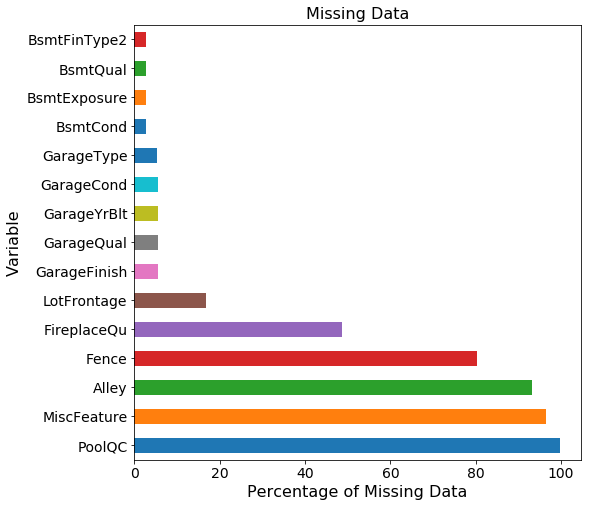

In [254]:
plt.figure(figsize=(8,8))
null.head(15).plot.barh()
plt.title('Missing Data', fontsize = 16)
plt.xlabel('Percentage of Missing Data', fontsize = 16)
plt.ylabel('Variable', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14);

Revisemos la descripción de todas las variables con valores nulos para determinar con qué remplazarlos en cada caso:

* PoolQC: valores NA significan 'Non a Pool'. Remplacemos por los strings 'None'.

* MiscFeature: valores NA significan que no hay Miscelanious Feature. Remplacemos por los strings 'None'.

* Alley: valores NA signifan que la casa no tiene acceso a un callejón. Remplacemos por 'None'

* Fence: valores NA significan que la casa no cuenta con cerca. Remplacemos por 'None'.

* FireplaceQu: valores NA significan que la casa no tiene chimenea. Remplacemos por 'None'

* LotFrontage: en este caso LotFrontage es la longitud medida en pies de porción de la calle que conecta a la casa. Valores NA corresponden a casas donde, por x o por y, esta variable no fue o no pudo ser medida. En este caso conviene remplazar los NA por la mediana de los datos.

* GarageQual: valores NA significan que la casa no tiene garage. Remplacemos por 'None'

* GarageYrBlt: este es el año en qué se construyó el garage. Valores NA podrían corresponder a casas sin Garage o a casas cuyos Garages no se sabe cuándo fueron construídos. Notemos que hay un grupo de variables Garage que comparten un 5 % de valores NA. Con base en esto, podemos decir que estos valores nulos corresponden a casas sin Garage. Remplacemos por 'None' en todas estas columnas.

* GarageFinish: por lo explicado en GarageYrBlt. Remplacemos por 'None'.

* GarageCond: por lo explicado en GarageYrBlt. Remplacemos por 'None'.

* GarageType: por lo explicado en GarageYrBlt. Remplacemos por 'None'.

* BsmtCond: valores NA significan que no hay sótano. Remplacemos por 'None'.

* BsmtExposure: valores NA significan que no hay sótano. Remplacemos por 'None'.

* BsmtQual: valores NA significan que no hay sótano. Remplacemos por 'None'.

* BsmtFinType2: valores NA significan que no hay sótano. Remplacemos por 'None'.

* BsmtFinType1: valores NA significan que no hay sótano. Remplacemos por 'None'.

* MasVnrType: valores NA significan que la casa no tiene chapa de mampostería (sea lo que sea que eso signifique). Remplacemos por 'None'.

* MasVnrArea: valores NA significan que la casa no tiene chapa de mampostería (sea lo que sea que eso signifique). Remplacemos por el valor cero.

* MSZoning: la clasificación de la zona donde se vendió la casa. Remplacemos por la moda. 

* BsmtHalfBath: valores NA significan que el sótano no tiene baño. Remplacemos por cero.

* Utilities: remplacemos con la moda.

* Functional: valores NA significan que la casa tiene funcionalidades típicas. Remplacemos por Ty.

* BsmtFullBath: valores NA significan que el sótano no tiene baño. Remplacemos por cero.

* Electrical: remplacemos por la moda.

* Exterior2nd: remplacemos por la moda.

* KitchenQual: remplacemos por la moda.

* GarageCars: valores NA significan que la casa no tiene Garage lo cual equivale a decir que le caben cero carros. Remplacemos por cero.

* Exterior1st: remplacemos por la moda.

* GarageArea: valores NA significan que la casa no tiene Garage lo cual equivale a decir que su Garage tiene área cero. Remplacemos por cero.

* TotalBsmtSF: valores NA significan que la casa no tiene sótano lo que equivale a tener área igual a cero. Remplacemos con cero.

* BsmtUnfSF: Remplacemos con cero.

* BsmtFinSF2: Remplacemos con cero.

* BsmtFinSF1: Remplacemos con cero.

* SaleType: Remplacemos con la moda.

Clasificamos las columnas con base en cómo vamos a remplazar sus valores nulos y luego procedemos a remplazarlos:

In [255]:
None_ = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageQual', 'GarageYrBlt', 'GarageFinish',
         'GarageCond', 'GarageType', 'BsmtCond', 'BsmtExposure', 'BsmtQual', 'BsmtFinType2', 'BsmtFinType1', 'MasVnrType'] 

Median = ['LotFrontage']         

Zero = ['MasVnrArea', 'BsmtHalfBath', 'BsmtFullBath', 'GarageCars', 'GarageArea', 'TotalBsmtSF', 'BsmtUnfSF', 'BsmtFinSF2', 'BsmtFinSF1']
         
Moda = ['MSZoning', 'Utilities', 'Electrical', 'Exterior2nd', 'Exterior1st', 'KitchenQual', 'SaleType']
         
Ty = ['Functional']

In [256]:
data[None_] = data[None_].fillna('None')

In [257]:
data[Zero] = data[Zero].fillna(0)

In [258]:
data['LotFrontage'] = data['LotFrontage'].fillna(data['LotFrontage'].median())

In [259]:
data['Functional'] = data['Functional'].fillna('Ty')

In [260]:
for i in Moda:
    data[i] = data[i].fillna(data[i].mode()[0])

Revisando que ya no tengamos valores nulos en los datos:

In [261]:
data.isnull().sum().sum()

0

## 5. Transformación de Variables

La variable MSSubClass está clasificada como int64, pero esta variable en realidad nos dice el tipo de casa qué se vende (de un piso, de dos pisos, etc.) por lo que debemos cambiar la variable de numérica a categórica: 

In [262]:
data.MSSubClass = data.MSSubClass.astype('object')

Lo mismo pasa con MoSold que nos dice el mes en que fue vendida la casa y lo tenemos como una variable numérica cuando debería ser categórica:

In [263]:
data.MoSold = data.MoSold.astype('object')

Las variables que tienen que ver con años en realidad no nos dicen mucho numéricamente hablando. Covirtámoslas a variables categóricas:


In [264]:
for i in ['GarageYrBlt', 'YearBuilt', 'YearRemodAdd', 'YrSold']:
    data[i] = data[i].astype('object')

In [265]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906 entries, 0 to 2905
Data columns (total 79 columns):
1stFlrSF         2906 non-null int64
2ndFlrSF         2906 non-null int64
3SsnPorch        2906 non-null int64
Alley            2906 non-null object
BedroomAbvGr     2906 non-null int64
BldgType         2906 non-null object
BsmtCond         2906 non-null object
BsmtExposure     2906 non-null object
BsmtFinSF1       2906 non-null float64
BsmtFinSF2       2906 non-null float64
BsmtFinType1     2906 non-null object
BsmtFinType2     2906 non-null object
BsmtFullBath     2906 non-null float64
BsmtHalfBath     2906 non-null float64
BsmtQual         2906 non-null object
BsmtUnfSF        2906 non-null float64
CentralAir       2906 non-null object
Condition1       2906 non-null object
Condition2       2906 non-null object
Electrical       2906 non-null object
EnclosedPorch    2906 non-null int64
ExterCond        2906 non-null object
ExterQual        2906 non-null object
Exterior1st      29

Ahora definamos una nueva variable llamada TotalSF que sea igual a la suma de BasementSF, 1stFlSF y 2ndFlSF:

In [266]:
data['TotalSF'] = data['TotalBsmtSF'] + data['1stFlrSF'] + data['2ndFlrSF']

## 6. Class Imbalance

Aquellas variables que tomen siempre o casi siempre el mismo valor no estarán aportando información relevante al estudio pues lo que querrán decir es que todas o casi todas las casas del dataset tienen la misma característica. Eliminemos aquellas columnas que tengan el mismo valor repetido más del 95 % de las veces:

In [267]:
cols_c = data.dtypes[data.dtypes == object].index

In [268]:
t = data[cols_c].describe().T
t['RelFreq'] = t['freq']/t['count']
t = t.sort_values('RelFreq', ascending = False)
cols_ci = t[t['RelFreq'] > 0.95].index

In [269]:
t.head()

,count,unique,top,freq,RelFreq
Utilities,2906,2,AllPub,2905,0.999656
PoolQC,2906,4,None,2897,0.996903
Street,2906,2,Pave,2895,0.996215
Condition2,2906,8,Norm,2877,0.990021
RoofMatl,2906,7,CompShg,2864,0.985547


In [270]:
data = data.drop(cols_ci,1)

Por último usemos la función get_dummies:

In [271]:
data = pd.get_dummies(data)

## 7. Machine Learning

Concatenemos y_train con el SalePricetest para formar el vector de la variable objetivo. Luego definimos X y y para dividirlo en  conjunto prueba y de entrenamiento.

In [272]:
from sklearn.model_selection import train_test_split

In [273]:
y_test = SalePriceTest.SalePrice
y = pd.concat([y_train, y_test], ignore_index = True)
X = data

X_train_test, X_valid, y_train_test, y_valid = train_test_split(X,y, test_size = 0.1, random_state = 69)

X_train, X_test, y_train, y_test = train_test_split(X_train_test,y_train_test,
                                                                test_size = 0.1, random_state = 69)


# train = data.loc[0:1446,:]
# test = data.loc[1447: , :]
# y_test = SalePriceTest.SalePrice

Antes de implementar los algoritmos, importamos las métricas y definimos la función con la que evaluaremos el rendimiento del modelo basados en rmse, r2_score y con el valor promedio de los residuos:

In [274]:
from sklearn.metrics import mean_squared_error, r2_score

In [275]:
def ev(y_pred,y_test):
    print('Mean Squared Error: %1.2f' % np.sqrt(mean_squared_error(y_pred,y_test)))
    plt.figure(figsize = (10,6))
    res = (y_pred-y_test)/y_test * 100
    res.hist(bins = 100)
    plt.xlabel('Residuo', fontsize = 15)
    plt.ylabel('Cuenta de Residuos', fontsize = 15)
    plt.title('Análisis de Residuos', fontsize = 15)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.xlim(res.quantile(0.005), res.quantile(0.99))
    plt.show()
    print('Las medidas de tendencia central de los residuos son: ')
    print(res.describe())
    plt.figure(figsize = (10,6))
    plt.scatter(y_pred,y_test)
    plt.xlabel('Prediction', fontsize = 15)
    plt.ylabel('Real Value', fontsize = 15)
    plt.title('Predictions Scaterring', fontsize = 15)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.show()
    print('R^2: %1.2f' %r2_score(y_test,y_pred))

### Decision Tree

In [276]:
from sklearn.tree import DecisionTreeRegressor

In [277]:
regressorT = DecisionTreeRegressor()

regressorT.fit(X_train, y_train)

y_predT = regressorT.predict(X_test)

Mean Squared Error: 60968.34


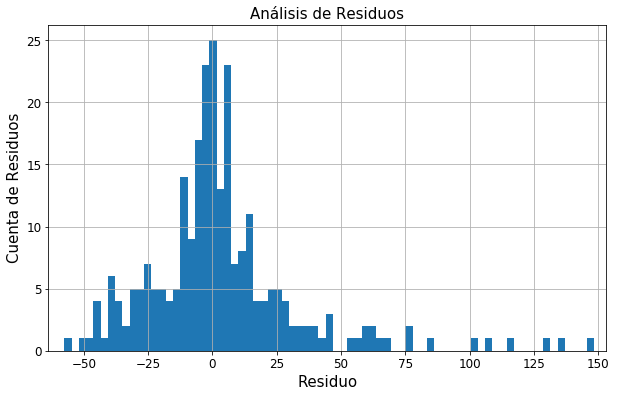

Las medidas de tendencia central de los residuos son: 
count    262.000000
mean       5.008769
std       35.980049
min      -77.307708
25%      -11.107854
50%       -0.263114
75%       12.455149
max      204.793002
Name: SalePrice, dtype: float64


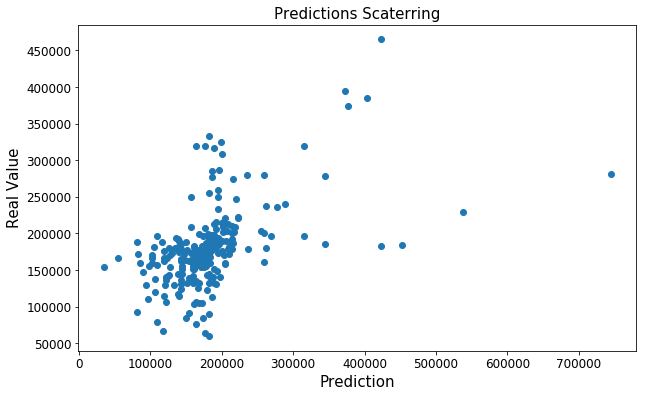

R^2: -0.32


In [278]:
ev(y_predT, y_test)

## Random Forest

In [279]:
from sklearn.ensemble import RandomForestRegressor

Las variables de mayor relevancia consideras por el algoritmo fueron:

In [280]:
# pd.DataFrame(
  #  regressorRF.feature_importances_,X_train.columns,columns=['imp']).sort_values(
   # 'imp',ascending=False).head(10).plot.barh()

In [281]:
#Se define profundidad
ND = 1
max_depth = None
# tamaño grid ntrees
min_trees = 200
max_trees = 250
grid_tree = np.linspace(min_trees, max_trees, 5).astype('int')
NT = len(grid_tree)
#matriz para guardar resultado de ecm
mse_error = np.zeros((NT))

for j,ntrees in enumerate(grid_tree):
    gs_rf = RandomForestRegressor(n_estimators= ntrees, max_depth = max_depth,
                                  n_jobs=-1, random_state = 69)

# hacer unestimación sobre train
    gs_rf.fit(X_train, y_train)
# hagamos un predict: tst
    rmse_test = np.sqrt(mean_squared_error(y_test, gs_rf.predict(X_test)))
# y guardemos
    mse_error[j] = rmse_test
    print("iteracion:",j+1,"numero de arboles:", ntrees,"error:", rmse_test)

iteracion: 1 numero de arboles: 200 error: 41341.25059723921
iteracion: 2 numero de arboles: 212 error: 41260.13534861915
iteracion: 3 numero de arboles: 225 error: 41218.43615985229
iteracion: 4 numero de arboles: 237 error: 41316.13849560752
iteracion: 5 numero de arboles: 250 error: 41254.174332256756


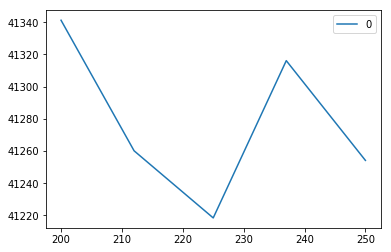

In [282]:
pd.DataFrame(mse_error,index=grid_tree).plot()

In [283]:
regressorRF = RandomForestRegressor(n_estimators= 250, max_depth = None,
                                  n_jobs=-1, random_state = 69)
regressorRF.fit(X_train,y_train)

y_predRF = regressorRF.predict(X_valid)

Mean Squared Error: 41182.29


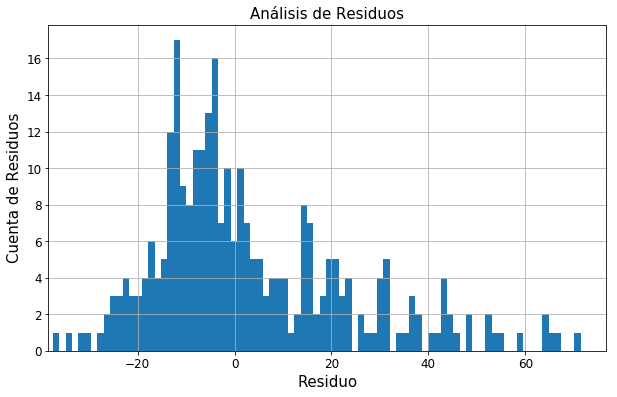

Las medidas de tendencia central de los residuos son: 
count    291.000000
mean       3.922116
std       22.534765
min      -41.454867
25%      -11.265189
50%       -3.045524
75%       15.120263
max       89.796932
Name: SalePrice, dtype: float64


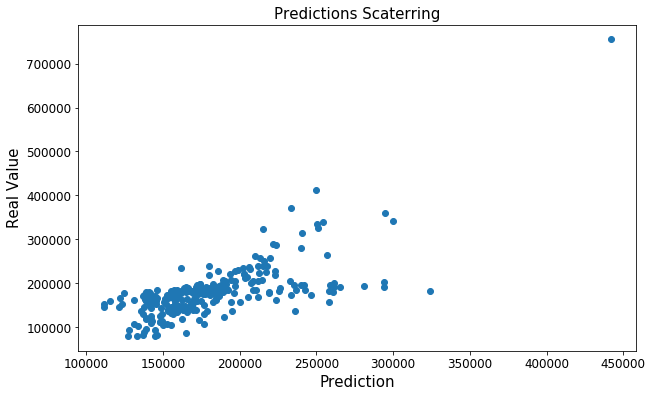

R^2: 0.49


In [284]:
ev(y_predRF,y_valid)

Tenemos un RMSE de 42 mil dólares. ¿Es esto mucho? Tomando en cuenta que, acorde al análisis de estadística descriptiva hecho al principio de este estudio, los precios de las casas tienen un valor promedio de 180 mil dólares con una desviación estándar de 80 mil dólares. 


In [285]:
e = 42/180*100
print('El error respecto al valor promedio del precio de casas es: %1.2f' % e + ' por ciento')
f = 42/100*100
print('El error respecto al valor promedio menos una desviación estándar del precio de casas es: %1.2f' % f + ' por ciento')
g = 42/260*100
print('El error respecto al valor promedio más una desviación estándar del precio de casas es: %1.2f' % g + ' por ciento')



El error respecto al valor promedio del precio de casas es: 23.33 por ciento
El error respecto al valor promedio menos una desviación estándar del precio de casas es: 42.00 por ciento
El error respecto al valor promedio más una desviación estándar del precio de casas es: 16.15 por ciento


Nuestro mejor modelo nos ha dado un mse del 23 % respecto al valor promedio.